In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_burden = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data_burden = data_burden[data_burden['burden'].notna()]
data_burden = data_burden[data_burden.columns[data_burden.isnull().mean() < 0.2]]

data_burden.columns[data_burden.isnull().any()]

for column in data_burden.columns:
    data_burden[column].fillna(data_burden[column].mode()[0], inplace=True)

median = data_burden.loc[data_burden['agecr'] < 200, 'agecr'].median()
data_burden["agecr"] = np.where(data_burden["agecr"] > 200, median,data_burden['agecr'])

# random forest
from sklearn.ensemble import RandomForestRegressor

X_feature = data_burden.drop('burden', axis = 1)
y_feature = data_burden['burden']

#m = sqrt(p)+1 features
nfeatures = data_burden.shape[1] - 1
feature_model = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
feature_model.fit(X_feature,y_feature)

#y_hat = feature_model.predict(X)



df_feature = pd.DataFrame(zip(X_feature.columns, feature_model.feature_importances_), columns = ['feature','importance'])
df_feature = df_feature.sort_values(by=['importance'], ascending=False)
#plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])


df_feature[0:29]

,feature,importance
87,burdcat,0.194899
84,hours,0.116115
71,adls,0.111494
85,hourscat,0.101475
86,banhours,0.072848
83,q25,0.070134
65,q22a,0.057458
66,q22b,0.034405
68,q22d,0.027614
88,n3,0.023265


In [3]:
data_burden = data_burden[['q18', 'hours', 'adls', 'q22a', 'q22b', 'q22d', 'n3', 'q22c', 'iadls', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e', 'burden']]

In [4]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data_burden = data_burden.loc[data_burden['q18'].isin(lst)]
data_burden["q18"] = data_burden["q18"].astype(str)
data_burden["q18"] = data_burden["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
data_burden

,q18,hours,adls,q22a,q22b,q22d,n3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,Alzheimer,25.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,4.0
7969,Stroke,90.0,6.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
7970,Arthritis,20.0,0.0,2.0,2.0,2.0,1.0,2.0,6.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0
7971,BrokenBones,40.0,4.0,1.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0


In [5]:
lst2 = ['q22a', 'q22b', 'q22d', 'n3', 'q22c', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e']
data_burden[lst2] = data_burden[lst2].astype(object)

In [6]:
data_burden = data_burden[data_burden['q22a'] != 3.0]
data_burden = data_burden[data_burden['q22a'] != 4.0]
data_burden = data_burden[data_burden['q22b'] != 3.0]
data_burden = data_burden[data_burden['q22b'] != 4.0]
data_burden = data_burden[data_burden['q22d'] != 3.0]
data_burden = data_burden[data_burden['q22d'] != 4.0]
data_burden = data_burden[data_burden['n3'] != 3.0]
data_burden = data_burden[data_burden['n3'] != 4.0]
data_burden = data_burden[data_burden['q22c'] != 3.0]
data_burden = data_burden[data_burden['q22c'] != 4.0]
data_burden = data_burden[data_burden['q22g'] != 3.0]
data_burden = data_burden[data_burden['q22g'] != 4.0]
data_burden = data_burden[data_burden['q22f'] != 3.0]
data_burden = data_burden[data_burden['q22f'] != 4.0]
data_burden = data_burden[data_burden['q23d'] != 3.0]
data_burden = data_burden[data_burden['q23d'] != 4.0]
data_burden = data_burden[data_burden['q23c'] != 3.0]
data_burden = data_burden[data_burden['q23c'] != 4.0]
data_burden = data_burden[data_burden['q22e'] != 3.0]
data_burden = data_burden[data_burden['q22e'] != 4.0]
data_burden = data_burden[data_burden['banlives'] != 3.0]

In [7]:
data_burden.head()

,q18,hours,adls,q22a,q22b,q22d,n3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden
3,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0
5,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0
13,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0
24,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0
36,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0


In [8]:
data_burden["q22a"] = data_burden["q22a"].astype(str)
data_burden["q22a"] = data_burden["q22a"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22b"] = data_burden["q22b"].astype(str)
data_burden["q22b"] = data_burden["q22b"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22d"] = data_burden["q22d"].astype(str)
data_burden["q22d"] = data_burden["q22d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["n3"] = data_burden["n3"].astype(str)
data_burden["n3"] = data_burden["n3"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22c"] = data_burden["q22c"].astype(str)
data_burden["q22c"] = data_burden["q22c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22g"] = data_burden["q22g"].astype(str)
data_burden["q22g"] = data_burden["q22g"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22f"] = data_burden["q22f"].astype(str)
data_burden["q22f"] = data_burden["q22f"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23d"] = data_burden["q23d"].astype(str)
data_burden["q23d"] = data_burden["q23d"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q23c"] = data_burden["q23c"].astype(str)
data_burden["q23c"] = data_burden["q23c"].replace(["1.0","2.0"], ["Yes","No"])
data_burden["q22e"] = data_burden["q22e"].astype(str)
data_burden["q22e"] = data_burden["q22e"].replace(["1.0","2.0"], ["Yes","No"])

data_burden["banlives"] = data_burden["banlives"].astype(str)
data_burden["banlives"] = data_burden["banlives"].replace(["1.0","2.0"], ["Yes","No"])

In [9]:
data_burden.columns = ['illness', 'hours', 'adls', 'help_with_bed', 'help_with_dressed', 'help_with_bathe', 'help_with_med', 'help_with_toilet', 'iadls', 'giving_medicine', 'help_with_feeding', 'preparing_meals', 'live_with_cr', 'help_housework', 'help_with_diapers', 'burden']
data_burden = data_burden.reset_index(drop=True)

In [10]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data_burden, title="Report")
#profile

## Plots

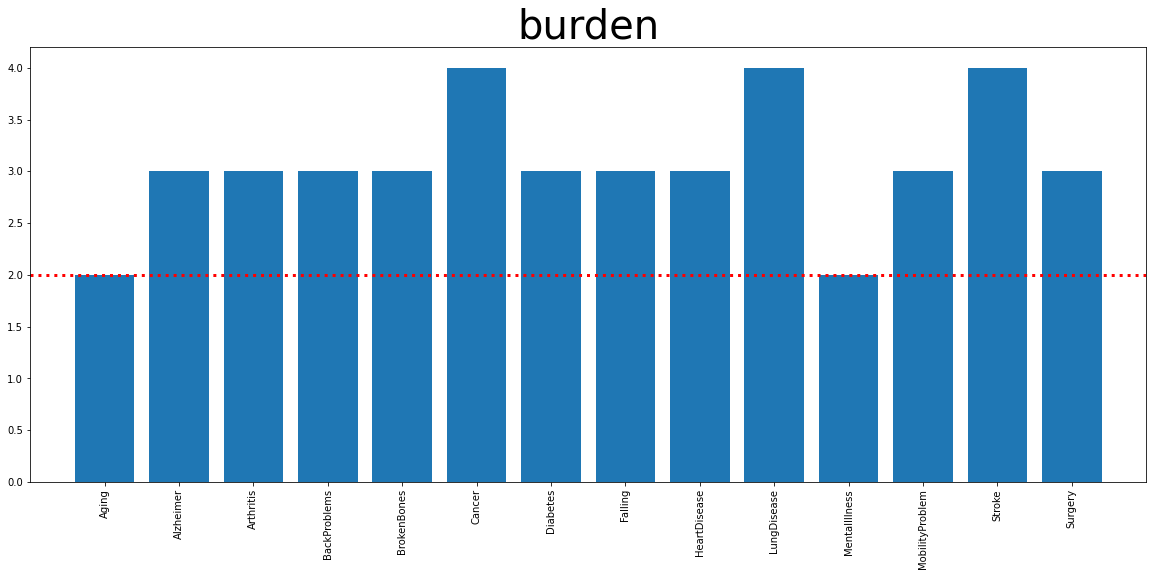

In [11]:
df_1 = data_burden.groupby(['illness'])['burden'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['burden'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['burden'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "burden", fontsize=40)
plt.plot()
plt.show()

In [12]:
data_burden.head()

,illness,hours,adls,help_with_bed,help_with_dressed,help_with_bathe,help_with_med,help_with_toilet,iadls,giving_medicine,help_with_feeding,preparing_meals,live_with_cr,help_housework,help_with_diapers,burden
0,Aging,28.0,0.0,No,No,No,No,No,4.0,No,No,Yes,Yes,Yes,No,3.0
1,MobilityProblem,0.5,4.0,Yes,Yes,No,Yes,No,6.0,Yes,Yes,Yes,No,Yes,Yes,3.0
2,Arthritis,77.0,0.0,No,No,No,Yes,No,5.0,Yes,No,No,No,Yes,No,4.0
3,Cancer,12.0,0.0,No,No,No,No,No,6.0,No,No,Yes,No,Yes,No,2.0
4,Diabetes,21.0,2.0,Yes,No,No,Yes,Yes,7.0,Yes,No,Yes,No,Yes,No,4.0


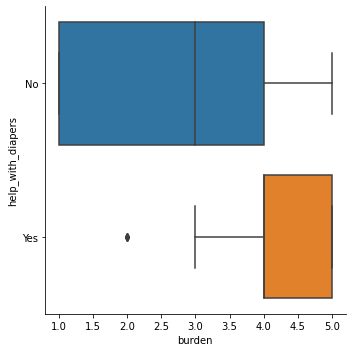

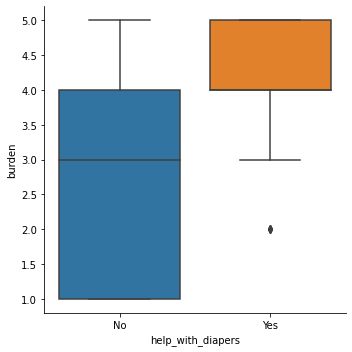

In [13]:
sns.catplot(x="burden", y="help_with_diapers", kind="box", data=data_burden)
sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_burden)

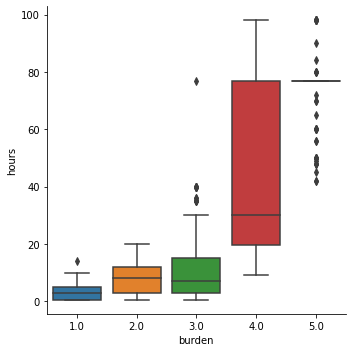

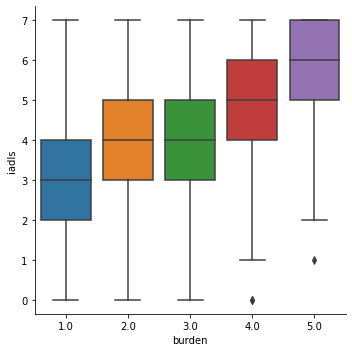

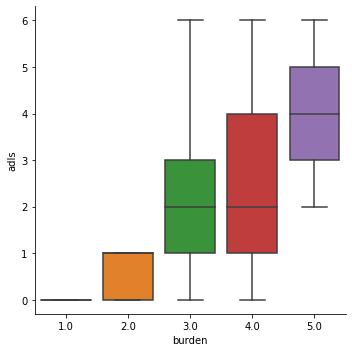

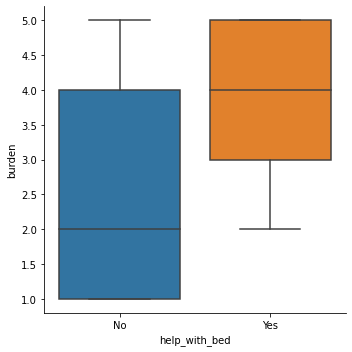

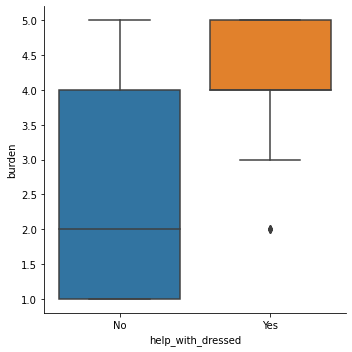

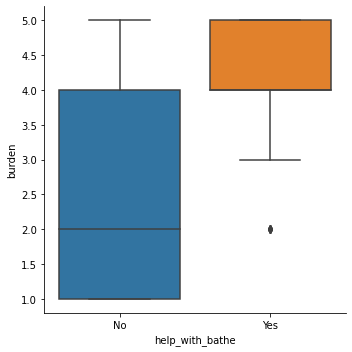

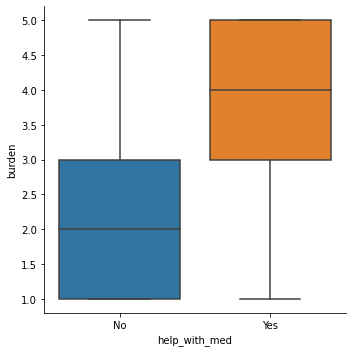

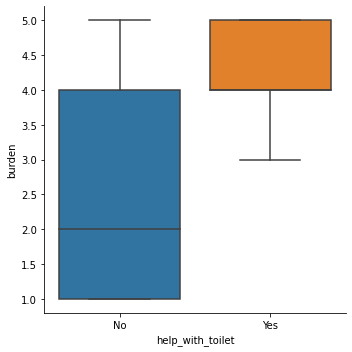

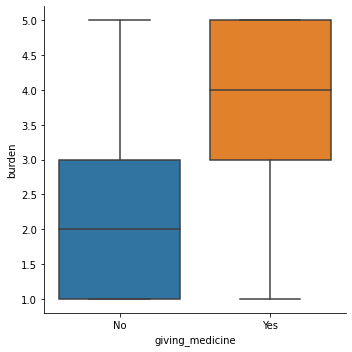

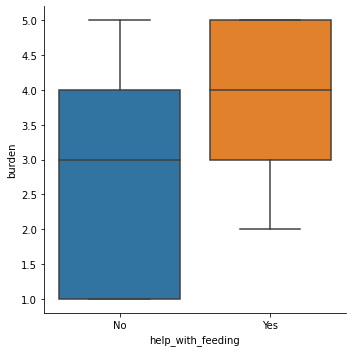

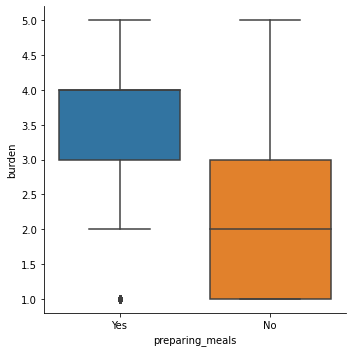

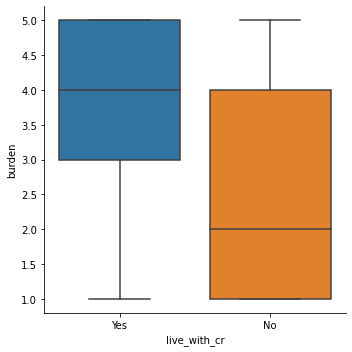

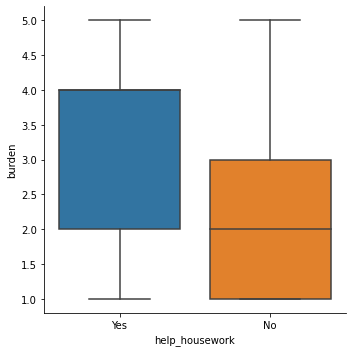

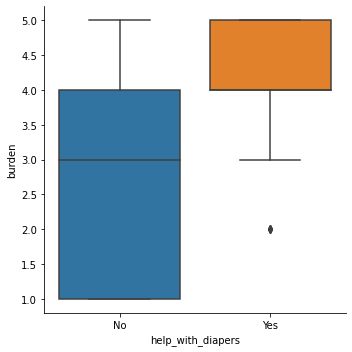

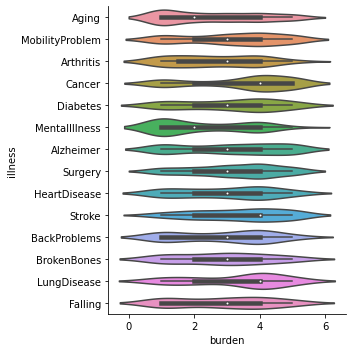

In [14]:
sns.catplot(x="burden", y="hours", kind="box", data=data_burden)

sns.catplot(x="burden", y="iadls", kind="box", data=data_burden)

sns.catplot(x="burden", y="adls", kind="box", data=data_burden)

sns.catplot(x="help_with_bed", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_dressed", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_bathe", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_med", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_toilet", y="burden", kind="box", data=data_burden)

sns.catplot(x="giving_medicine", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_feeding", y="burden", kind="box", data=data_burden)

sns.catplot(x="preparing_meals", y="burden", kind="box", data=data_burden)

sns.catplot(x="live_with_cr", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_housework", y="burden", kind="box", data=data_burden)

sns.catplot(x="help_with_diapers", y="burden", kind="box", data=data_burden)



sns.catplot(x="burden", y="illness",
            kind="violin", data=data_burden)


## Regression

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_cont = data_burden.select_dtypes(include=numerics)
df_cat = data_burden.select_dtypes(include = 'object')

### Dummy Code Categoricals

In [16]:
df_cat_dc = pd.get_dummies(df_cat)
df_cat_dc

,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,illness_BrokenBones,illness_Cancer,illness_Diabetes,illness_Falling,illness_HeartDisease,illness_LungDisease,...,help_with_feeding_No,help_with_feeding_Yes,preparing_meals_No,preparing_meals_Yes,live_with_cr_No,live_with_cr_Yes,help_housework_No,help_housework_Yes,help_with_diapers_No,help_with_diapers_Yes
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1231,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1232,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1233,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0


In [17]:
df_reg = pd.concat([df_cont, df_cat_dc], axis = 1)
df_reg

,hours,adls,iadls,burden,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,illness_BrokenBones,illness_Cancer,...,help_with_feeding_No,help_with_feeding_Yes,preparing_meals_No,preparing_meals_Yes,live_with_cr_No,live_with_cr_Yes,help_housework_No,help_housework_Yes,help_with_diapers_No,help_with_diapers_Yes
0,28.0,0.0,4.0,3.0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1,0.5,4.0,6.0,3.0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1
2,77.0,0.0,5.0,4.0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
3,12.0,0.0,6.0,2.0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,1,1,0
4,21.0,2.0,7.0,4.0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,25.0,2.0,6.0,4.0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,1,0
1231,90.0,6.0,7.0,5.0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
1232,20.0,0.0,6.0,2.0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0
1233,40.0,4.0,5.0,4.0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0


### Helper Function 10-CV

In [18]:
# 10-Fold Cross Validation
def cross_validation (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
    kf_rmse = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'burden']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'burden']
        y_train = df.iloc[train].loc[:,'burden']
        y_test = df.iloc[test].loc[:,'burden']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import mean_squared_error
        kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))
        
    kf_RMSE = (1/10) * np.sum(kf_rmse)
        
    return (kf_RMSE)

In [19]:
X = df_reg.drop('burden', axis = 1)
y = df_reg['burden']

### Linear Regression

In [20]:
#Check which one produces higher R2 score and lower cv-rmse
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(X, y)

y_hat1 = model1.predict(X)

score1 = model1.score(X, y)

from sklearn.metrics import mean_squared_error
model1_train_rmse = mean_squared_error(y, y_hat1, squared=False)

model1_cv_rmse = cross_validation(df_reg, model1)

print('train RMSE = ', model1_train_rmse)
print('10 CV RMSE = ', model1_cv_rmse)
print('score1 = ', score1)

train RMSE =  0.5465707645795032
10 CV RMSE =  0.5594152414792956
score1 =  0.8549877224483213


In [21]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Text(0, 0.5, 'Predicted Value')

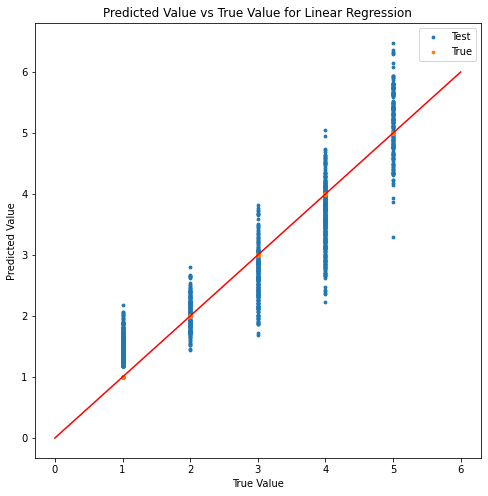

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(x = y, y = y_hat1, s = 8, label = "Test")
#plt.scatter(x = y_train, y = ols.predict(X_train), s = 8, label = "Train")
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.plot([0,6], [0,6], color = "r")
plt.legend(loc=0)
plt.title("Predicted Value vs True Value for Linear Regression")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

### Random Forest

In [23]:
randomForest = RandomForestRegressor(random_state = 0)

In [24]:
grid_para_forest = {'n_estimators': [100,500,1000,2500,5000],
'max_depth': [10,15,20,30,40,50],
'max_features' : [5,7,15]}

In [25]:
from sklearn.model_selection import GridSearchCV

grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=10, n_jobs = 5, verbose=1)
grid_search_forest.fit(X, y)


Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=5,
             param_grid={'max_depth': [10, 15, 20, 30, 40, 50],
                         'max_features': [5, 7, 15],
                         'n_estimators': [100, 500, 1000, 2500, 5000]},
             verbose=1)

In [26]:
model2 = grid_search_forest.best_estimator_
yhat_2 = model2.predict(X)

In [27]:
model2_train_rmse = mean_squared_error(y, yhat_2, squared=False)
model2_cv_rmse = cross_validation(df_reg, model2)
score2 = model2.score(X, y)

print('train RMSE = ', model2_train_rmse)
print('10 CV RMSE = ', model2_cv_rmse)
print('score2 = ', score2)

train RMSE =  0.03316872740822216
10 CV RMSE =  0.09427095151296339
score2 =  0.999190366425878


Text(0, 0.5, 'Predicted Value')

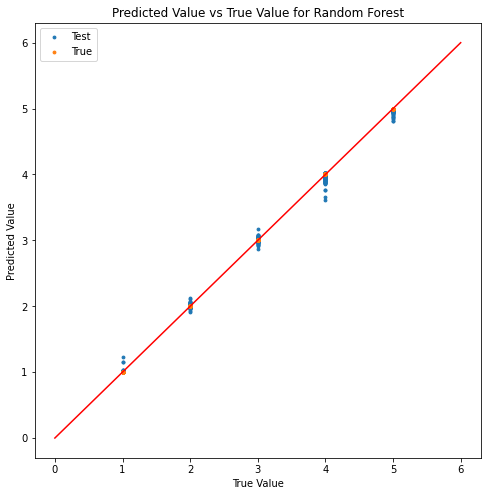

In [28]:
plt.figure(figsize = (8,8))
plt.scatter(x = y, y= yhat_2, s = 8, label = "Test")
#plt.scatter(x = y_train, y=bestmodel_rf.predict(X_train), s=8, label = "Train")
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.plot([0,6],[0,6], color = 'r')
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Random Forest")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

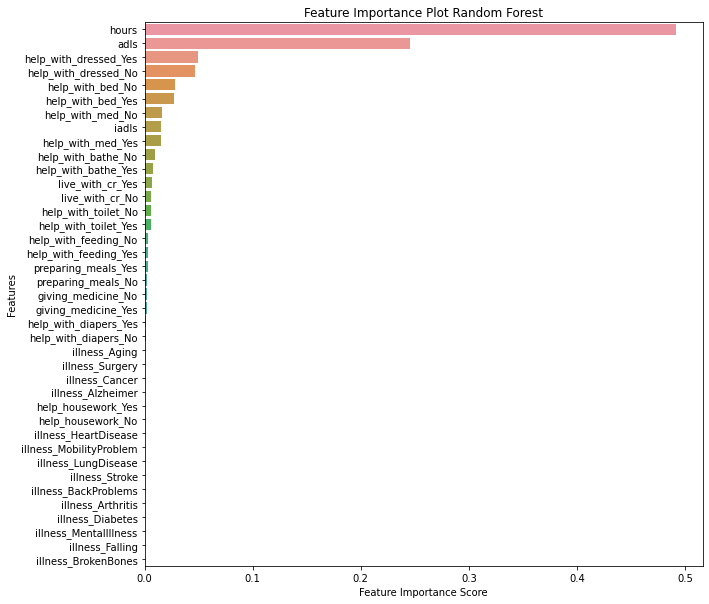

In [29]:
sorted_importance = sorted(zip(X.columns, model2.feature_importances_), key=lambda t:t[1], reverse = True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y='feature_name', orient = 'h');
plt.title('Feature Importance Plot Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [30]:
imp_cols = df[df['importance_score'] > 0.004]['feature_name'].tolist()

In [31]:
grid_search_forest.fit(X[imp_cols], y)

model22 = grid_search_forest.best_estimator_
y_hat22 = model22.predict(X[imp_cols])

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [32]:
model22_train_rmse = mean_squared_error(y, y_hat22, squared=False)
model22_cv_rmse = cross_validation(df_reg, model22)
score22 = model22.score(X, y)

print('train RMSE = ', model22_train_rmse)
print('10 CV RMSE = ', model22_cv_rmse)
print('score22 = ', score22)

train RMSE =  0.02841654305203819
10 CV RMSE =  0.09585218328088471
score22 =  0.9990733926864596


Text(0, 0.5, 'Predicted Value')

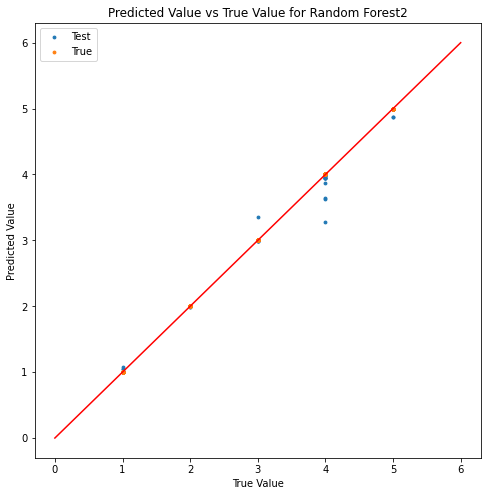

In [33]:
plt.figure(figsize = (8,8))
plt.scatter(x = y, y= y_hat22, s = 8, label = "Test")
#plt.scatter(x = y_train, y=bestmodel_rf.predict(X_train), s=8, label = "Train")
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.plot([0,6],[0,6], color = 'r')
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Random Forest2")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

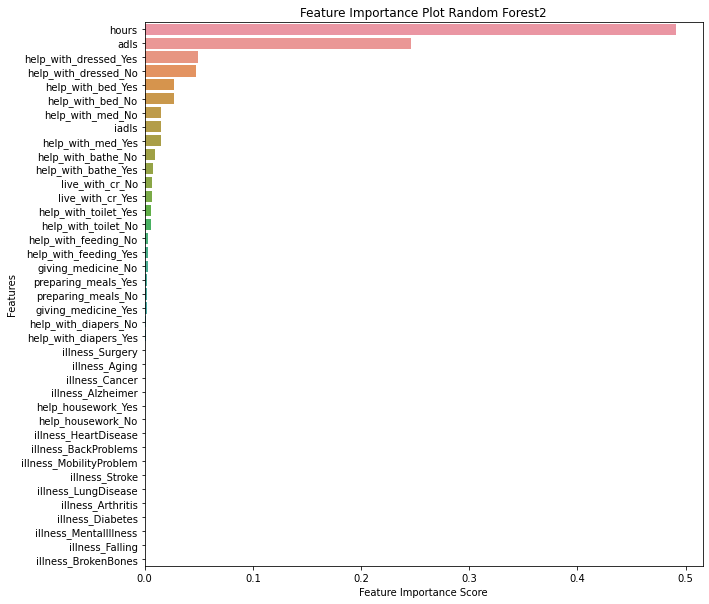

In [34]:
sorted_importance = sorted(zip(X.columns, model22.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance Plot Random Forest2')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')


## Gradient Boost

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state = 0)

In [36]:
grid_para_gb = {'n_estimators': [100,500,1000,2500,5000],
                   'learning_rate':[0.01,0.05,0.1],
                   'max_depth':range(1,6),
                   'max_features' : [5,7,15]}

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search_gb = GridSearchCV(gbm, grid_para_gb, cv=5, n_jobs = 5, verbose = 1)
grid_search_gb.fit(X, y)


Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': range(1, 6), 'max_features': [5, 7, 15],
                         'n_estimators': [100, 500, 1000, 2500, 5000]},
             verbose=1)

In [38]:
model3 = grid_search_gb.best_estimator_
yhat_3 = model3.predict(X)

In [39]:
model3_train_rmse = mean_squared_error(y, yhat_3, squared=False)
model3_cv_rmse = cross_validation(df_reg, model3)
score3 = model3.score(X, y)

print('train RMSE = ', model3_train_rmse)
print('10 CV RMSE = ', model3_cv_rmse)
print('score3 = ', score3)

train RMSE =  0.002999948227683812
10 CV RMSE =  0.06261327690279188
score3 =  0.9998805549106379


Text(0, 0.5, 'Predicted Value')

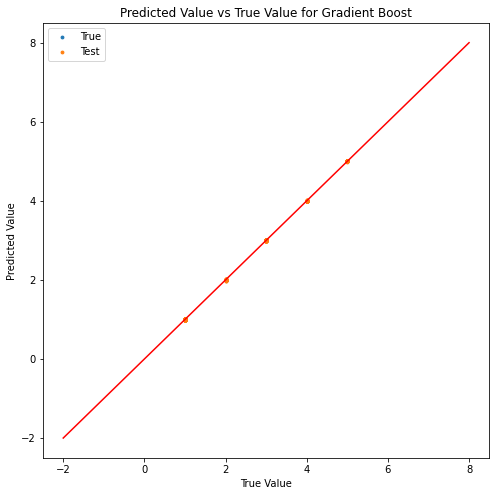

In [40]:
plt.figure(figsize=(8,8))
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.scatter(x = y, y = yhat_3, s = 8, label = "Test")
#plt.scatter(x = y_train, y = bestmodel_rf.predict(X_train), s = 8, label = "Train")
plt.plot([-2,8],[-2,8], color = "r")
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Gradient Boost")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

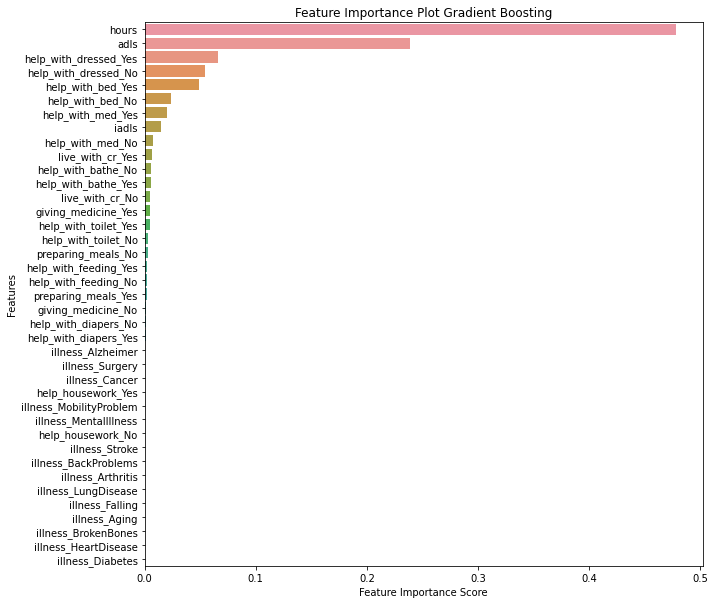

In [41]:
sorted_importance = sorted(zip(X.columns, model3.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance Plot Gradient Boosting')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

In [42]:
imp_cols = df[df['importance_score'] > 0.004]['feature_name'].tolist()

In [43]:
grid_search_gb.fit(X[imp_cols], y)

model33 = grid_search_gb.best_estimator_
yhat_33 = model33.predict(X[imp_cols])

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


In [44]:
model33_train_rmse = mean_squared_error(y, yhat_33, squared=False)
model33_cv_rmse = cross_validation(df_reg, model33)
score33 = model33.score(X, y)

print('train RMSE = ', model33_train_rmse)
print('10 CV RMSE = ', model33_cv_rmse)
print('score33 = ', score33)

train RMSE =  0.00016229688440988393
10 CV RMSE =  0.11868538044947126
score33 =  0.9995164120488264


Text(0, 0.5, 'Predicted Value')

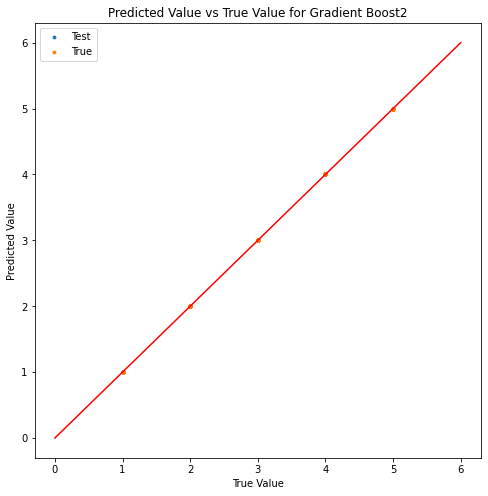

In [45]:
plt.figure(figsize = (8,8))
plt.scatter(x = y, y= yhat_33, s = 8, label = "Test")
#plt.scatter(x = y_train, y=bestmodel_rf.predict(X_train), s=8, label = "Train")
plt.scatter(x = y, y = y, s = 8, label = "True")
plt.plot([0,6],[0,6], color = 'r')
plt.legend(loc = 0)
plt.title("Predicted Value vs True Value for Gradient Boost2")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Text(0, 0.5, 'Features')

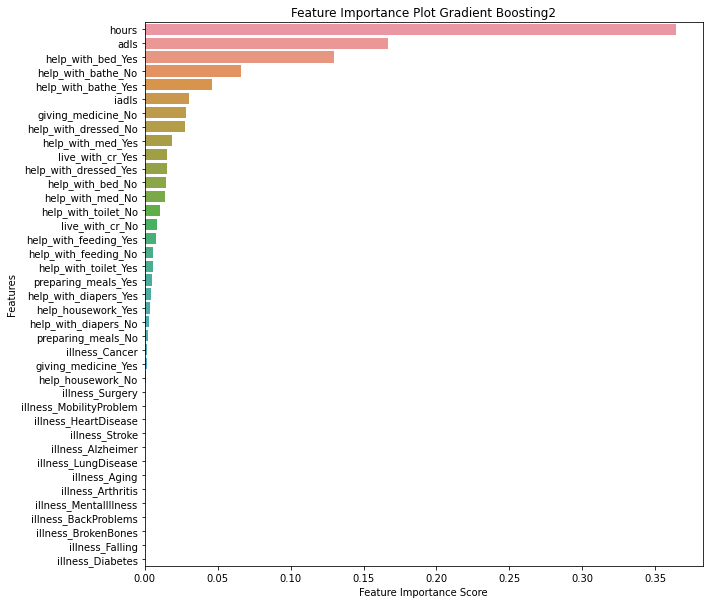

In [46]:
sorted_importance = sorted(zip(X.columns, model33.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (10,10))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df, x = 'importance_score', y= 'feature_name', orient = 'h');
plt.title('Feature Importance Plot Gradient Boosting2')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

### RMSE Summary

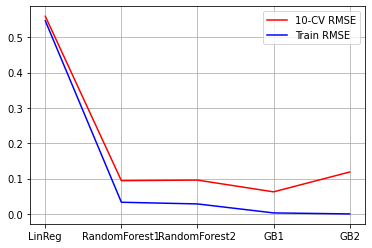

In [47]:
x = ['LinReg', 'RandomForest1', 'RandomForest2', 'GB1', 'GB2']
y1 = [model1_train_rmse, model2_train_rmse, model22_train_rmse, model3_train_rmse, model33_train_rmse]
y2 = [model1_cv_rmse, model2_cv_rmse, model22_cv_rmse, model3_cv_rmse, model33_cv_rmse]

plt.plot(x, y2, label = "10-CV RMSE", c='r')
plt.plot(x, y1, label = "Train RMSE", c='b')
plt.legend()
plt.grid()
plt.show()

## Classification